In [41]:
from __future__ import print_function

import argparse

import numpy as np
import torch
import torch.utils.data

import make_hierarchical_signals
from model import RecurrentNetContinual

import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
use_cuda = False
torch.manual_seed(1)
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

model = RecurrentNetContinual(n_in=200, n_hid=300, n_out=1,
                                  t_constant=0.3, use_cuda=use_cuda).to(device)
model.load_state_dict(torch.load('./work/04011922_recurrent_memory_fix_inmatrix_pos_neg_epoch_40.pth', map_location='cpu'))


cpu


In [44]:
signals = []
targets = []
for i in range(1):
    signal, target = make_hierarchical_signals.hierarchical_signals(n_episodes=20,
                                                                        stim_dur=10,
                                                                        sig1_stim_dur=10,
                                                                        resp_dur=5,
                                                                        each_episodes=20,
                                                                        spon_rate=0.01)
    signals.append(signal)
    targets.append(target)

signals = np.array(signals)
targets = np.array(targets)

signals = torch.from_numpy(signals)
targets = torch.from_numpy(targets)

hidden = torch.zeros(1, 300, requires_grad=False)
hidden = hidden.to(device)

signals = signals.float()
targets = targets.float()

signals, targets = signals.to(device), targets.to(device)

hidden_list, output, hidden = model(signals, hidden)


In [45]:
print(hidden_list.shape)

torch.Size([1, 900, 300])


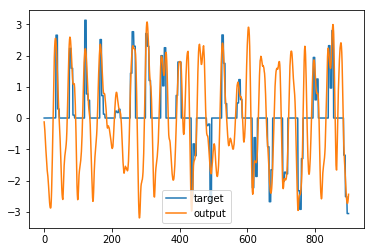

In [46]:
plt.plot(targets[0].data.numpy().T[0], label='target')
plt.plot(output[0].data.numpy().T[0], label='output')
plt.legend()

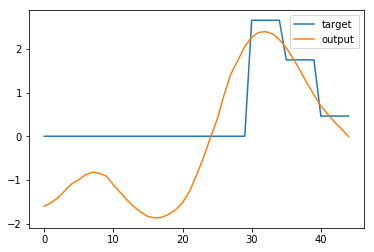

In [47]:
plt.plot(targets[0].data.numpy().T[0][495:540], label='target')
plt.plot(output[0].data.numpy().T[0][495:540], label='output')
plt.legend()

In [48]:
print(hidden_list.data.numpy()[0].T)

[[0.00000000e+00 5.20557165e-02 1.02524094e-01 ... 1.13033615e-02
  7.91235268e-03 5.53864660e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.86132097e-02 1.86924249e-01 3.16190898e-01 ... 1.33541369e+00
  1.15809464e+00 9.76440072e-01]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.92723894e-03 5.54906717e-03 3.88434692e-03 ... 8.78438592e-01
  9.11033392e-01 9.39571738e-01]
 [9.02379081e-02 3.61730516e-01 6.34086013e-01 ... 3.95137095e+00
  3.75186944e+00 3.50733948e+00]]


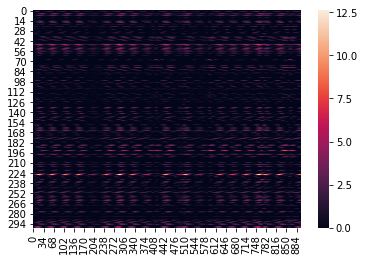

In [49]:
import seaborn as sns
sns.heatmap(hidden_list.data.numpy()[0].T)

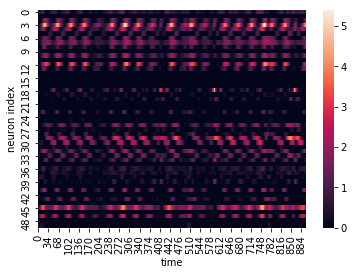

In [50]:
sns.heatmap(hidden_list.data.numpy()[0].T[50:100])
plt.xlabel('time')
plt.ylabel('neuron index')
plt.savefig('internal_dynamics2.png')

Text(0,0.5,'activation')

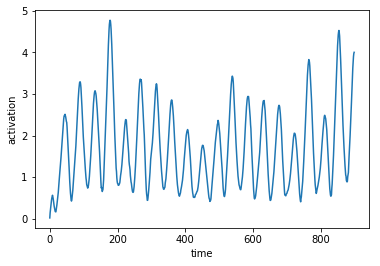

In [11]:
plt.plot(hidden_list.data.numpy()[0].T[7])
plt.xlabel('time')
plt.ylabel('activation')
# plt.savefig('activation2.png')

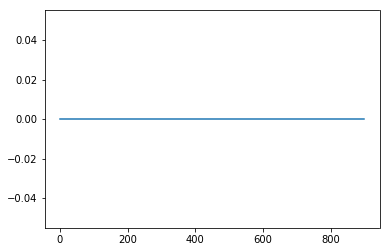

In [12]:
plt.plot(hidden_list.data.numpy()[0].T[9])

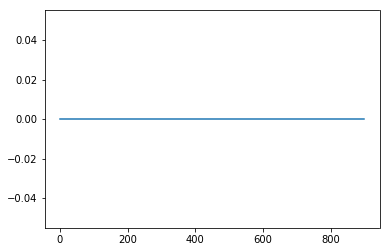

In [13]:
plt.plot(hidden_list.data.numpy()[0].T[12])

Text(0,0.5,'activation')

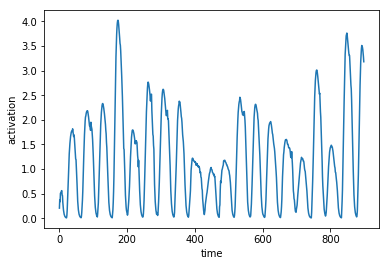

In [14]:
plt.plot(hidden_list.data.numpy()[0].T[16])
plt.xlabel('time')
plt.ylabel('activation')
# plt.savefig('activation1.png')

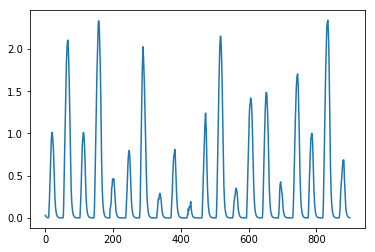

In [15]:
plt.plot(hidden_list.data.numpy()[0].T[27])

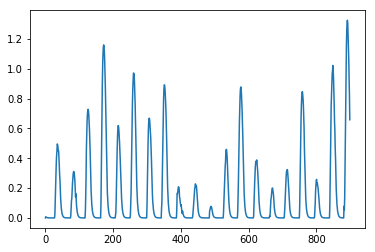

In [16]:
plt.plot(hidden_list.data.numpy()[0].T[30])

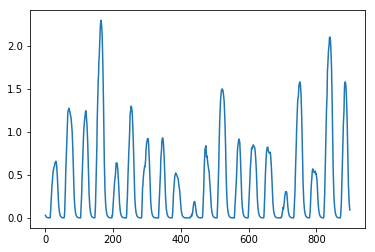

In [17]:
plt.plot(hidden_list.data.numpy()[0].T[31])

Text(33,0.5,'neuron index')

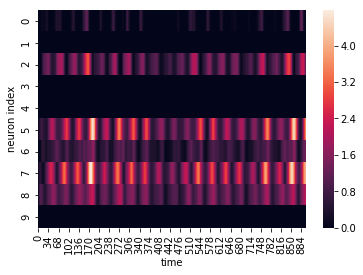

In [18]:
sns.heatmap(hidden_list.data.numpy()[0].T[0:10])
plt.xlabel('time')
plt.ylabel('neuron index')

In [19]:
print(hidden_list.data.numpy()[0].T[0:10, :45].shape)

(10, 45)


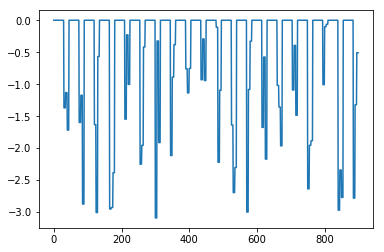

In [20]:
plt.plot(targets[0].data.numpy().T[0], label='target')

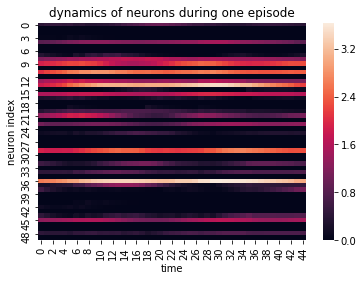

In [40]:
sns.heatmap(hidden_list.data.numpy()[0].T[0:50, 45:90])
plt.xlabel('time')
plt.ylabel('neuron index')
plt.title('dynamics of neurons during one episode')

# plt.savefig('dynamics2.png')

Text(33,0.5,'neuron index')

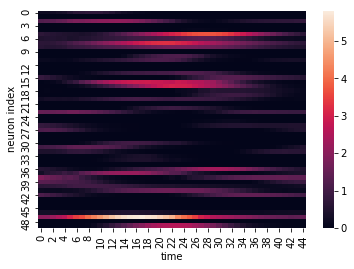

In [52]:
sns.heatmap(hidden_list.data.numpy()[0].T[0:50, 90:135])
plt.xlabel('time')
plt.ylabel('neuron index')

Text(33,0.5,'neuron index')

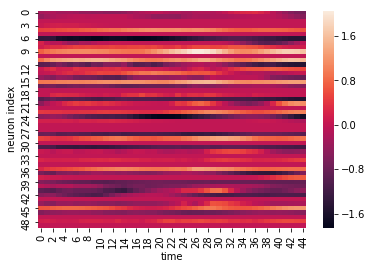

In [25]:
sns.heatmap(hidden_list.data.numpy()[0].T[0:50, 45:90]- hidden_list.data.numpy()[0].T[0:50, 810:855])
plt.xlabel('time')
plt.ylabel('neuron index')

Text(33,0.5,'neuron index')

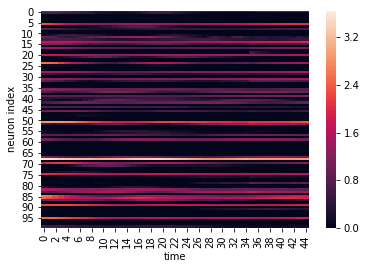

In [26]:
sns.heatmap(hidden_list.data.numpy()[0].T[0:100, 700:745])
plt.xlabel('time')
plt.ylabel('neuron index')

Text(33,0.5,'neuron index')

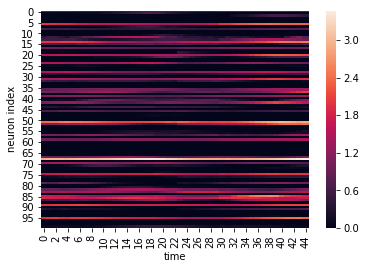

In [27]:
sns.heatmap(hidden_list.data.numpy()[0].T[0:100, 745:790])
plt.xlabel('time')
plt.ylabel('neuron index')

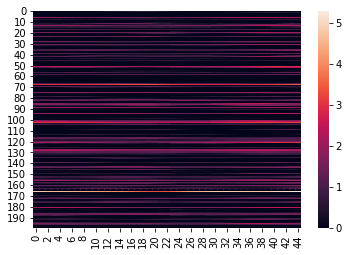

In [28]:
sns.heatmap(hidden_list.data.numpy()[0].T[0:300, 745:790])

Text(0,0.5,'activation')

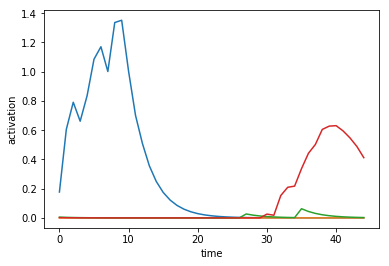

In [29]:
plt.plot(hidden_list.data.numpy()[0].T[2][:45])
plt.plot(hidden_list.data.numpy()[0].T[2][45:90])
plt.plot(hidden_list.data.numpy()[0].T[2][700:745])
plt.plot(hidden_list.data.numpy()[0].T[2][745:790])
plt.xlabel('time')
plt.ylabel('activation')
# plt.savefig('activation2.png')

Text(0,0.5,'activation')

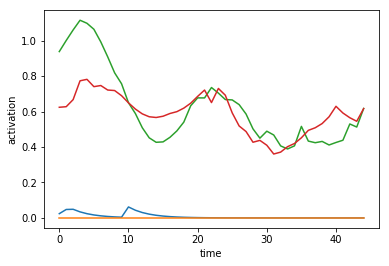

In [30]:
neuron_idx= 46
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][:45])
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][45:90])
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][700:745])
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][745:790])
plt.xlabel('time')
plt.ylabel('activation')
# plt.savefig('activation2.png')

Text(0,0.5,'activation')

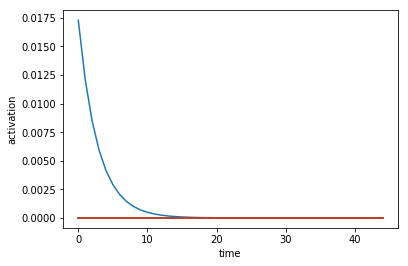

In [31]:
neuron_idx= 47
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][:45])
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][45:90])
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][700:745])
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][745:790])
plt.xlabel('time')
plt.ylabel('activation')

Text(0,0.5,'activation')

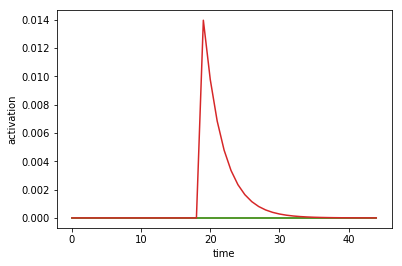

In [32]:
neuron_idx= 54
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][:45])
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][45:90])
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][700:745])
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][745:790])
plt.xlabel('time')
plt.ylabel('activation')

Text(0,0.5,'activation')

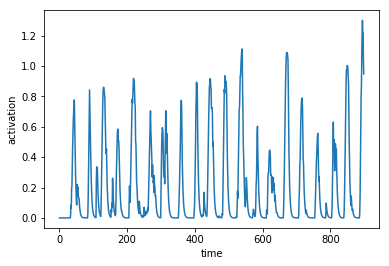

In [33]:
plt.plot(hidden_list.data.numpy()[0].T[7])
plt.xlabel('time')
plt.ylabel('activation')
# plt.savefig('activation2.png')

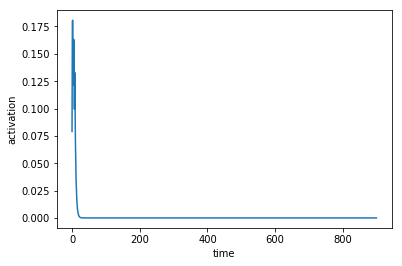

In [34]:
plt.plot(hidden_list.data.numpy()[0].T[53])
plt.xlabel('time')
plt.ylabel('activation')
plt.savefig('activation2.png')